# import packages 

In [1]:
#import packages needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# load files 

In [2]:
#load data files 
df = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_dnm.tsv")
df_ages= pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_parental_age.tsv")


# make dataframes for maternal and paternal phase_combined

In [3]:
#separate the de novo mutations into mother and father, phase combined
maternal=df[df["Phase_combined"]=="mother"].value_counts()
paternal=df[df["Phase_combined"]=="father"].value_counts()

#total number of mutations 
tot_dnm=(df['Proband_id'].value_counts())

In [4]:
#store the three dataframes (maternal, paternal, and total) into a new dataframe 
# new dataframe needs output: Proband_id, pat_dnm, mat_dnm, tot_dnm


#CODE ADAPTED FROM GROUP 
#create a tabular data structure with pd.DataFrame for total de novo mutations 
tot=pd.DataFrame(df['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))

In [5]:
#create a tabular data structure with pd.DataFrame for maternal de novo mutations 
maternal_prime=pd.DataFrame(df['Proband_id'][df["Phase_combined"]=="mother"].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))

In [6]:
#create a tabular data structure with pd.DataFrame for paternal de novo mutations 
paternal_prime=pd.DataFrame(df['Proband_id'][df["Phase_combined"] == "father"].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))

# merge dataframes 

In [7]:
#merge dataframes to include mother and father age 
merge1= pd.DataFrame.merge(tot, maternal_prime, on ='Proband_id')
merge2= pd.DataFrame.merge(merge1, paternal_prime, on ='Proband_id')
final_merge= pd.DataFrame.merge(merge2, df_ages, on ='Proband_id')
final_merge

,Proband_id,tot_dnm,mat_dnm,pat_dnm,Father_age,Mother_age
0,91410,122,10,111,51,34
1,114094,121,22,98,51,44
2,111288,115,21,93,53,44
3,8147,114,27,78,40,33
4,88246,113,25,87,56,46
...,...,...,...,...,...,...
391,121087,37,1,36,18,17
392,62630,34,5,28,23,20
393,76504,34,5,27,19,17
394,37789,34,3,17,19,19


# plot the count of maternal de novo mutations vs. maternal age

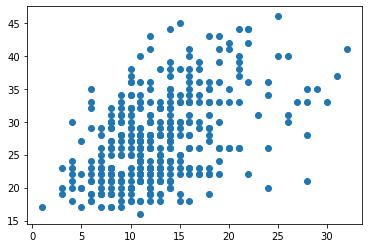

In [8]:
#scatter plot of mat_dnm and mother_age using final_merge 
fig, ax = plt.subplots()
ax.scatter(x=final_merge['mat_dnm'], y=final_merge['Mother_age'])

# plot the count of paternal de novo mutations vs. paternal age

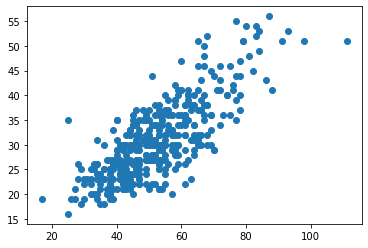

In [11]:
#scatter plot of pat_dnm and father_age using final_merge 
fig, ax = plt.subplots()
ax.scatter(x=final_merge['pat_dnm'], y=final_merge['Father_age'])

# Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations.

In [13]:
#use ordinary least squares, code adapted from master notebook 
model=smf.ols(formula="mat_dnm-1 ~ Mother_age", data= final_merge)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        16:01:44   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Use ordinary least squares smf.ols() to test for an association between paternal age and paternally inherited de novo mutations.¶

In [14]:
#use ordinary least squares, code adapted from master notebook 
model=smf.ols(formula="Father_age ~ pat_dnm", data= final_merge)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        16:02:12   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0178      0.972      7.220      0.000       5.107       8.929
pat_dnm        0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# histogram 

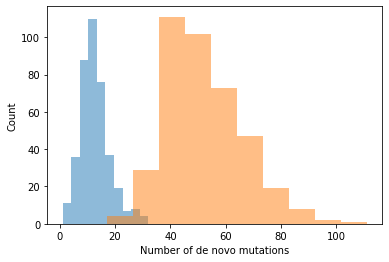

In [16]:
#make histogram with mat_dnm vs. maternal age overlaid with pat_dnm vs paternal age 
fig, ax= plt.subplots()
ax.hist(final_merge["mat_dnm"],bins=10,alpha=0.5, label= 'maternal')
ax.hist(final_merge["pat_dnm"],bins=10,alpha=0.5, label= 'paternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Count')
plt.show()


# FITTING POISSON MODEL 